# Pre-knowledge

###1 Data Manipulation

In [ ]:
import torch

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x.shape

torch.Size([12])

In [ ]:
x.numel()

12

In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
a0 = torch.zeros((2, 3, 4))
a0

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
a1 = torch.ones((2, 3, 4))
a1

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
ar = torch.randn(3, 4)
ar

tensor([[-0.9354, -1.5246,  1.6261,  0.5020],
        [-0.2025, -1.4580, -1.5357,  0.2344],
        [-0.1384, -0.3793, -0.4119,  1.4577]])

In [ ]:
au = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
au

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [ ]:
X = torch.arange(12, dtype=torch.float).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
X[-1], X[2, 3]

(tensor([ 8.,  9., 10., 11.]), tensor(11.))

In [ ]:
X[1, 2] = 9

In [ ]:
X[0:2, :] = 12

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z): ', id(Z))
Z[:] = X + Y
print('id(Z): ', id(Z))

id(Z):  139805135491440
id(Z):  139805135491440


In [ ]:
before = id(X)
X += Y
id(X) == before

True

In [ ]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [ ]:
X > Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

###2 Data Preprocessing

In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n')
  f.write('NA,Pave,127500\n')
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [3]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [4]:
# inputs: the first two columns of data
# outputs: the last columns of data
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [5]:
# As "Alley" has 2 different values, use "one-hot" encoding to separate them
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [6]:
# Convert to "tensor" format
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

###3 Linear Algebra

In [7]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [11]:
x_vec = torch.arange(4)
x_vec

tensor([0, 1, 2, 3])

In [14]:
x_vec[3]

tensor(3)

In [15]:
len(x_vec)

4

In [17]:
x_vec.shape

torch.Size([4])

In [18]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [19]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [21]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [22]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [23]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [24]:
A_Ex = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B_Ex = A_Ex.clone() # Assign a copy of A_Ex to B_Ex by allocating new memory
A_Ex, A_Ex + B_Ex

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [25]:
# Hadamard product
A_Ex * B_Ex

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [28]:
temp = 2
temp + X, (temp * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

In [31]:
# Dimensionality reduction
x_vec, x_vec.sum()

(tensor([0, 1, 2, 3]), tensor(6))

In [32]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190))

In [33]:
# axis=0 Dimensionality reduction by Row
# axis=1 Dimensionality reduction by Column
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40, 45, 50, 55]), torch.Size([4]))

In [34]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6, 22, 38, 54, 70]), torch.Size([5]))

In [35]:
# same as A.sum()
A.sum(axis=[0, 1])

tensor(190)

In [37]:
A_Ex.mean(), A_Ex.mean() / A_Ex.numel()

(tensor(9.5000), tensor(0.4750))

In [40]:
# .shape[0]: means Count the number of all elements on the "0 axis" (here means row)
# .shape[1]: means Count the number of all elements on the "1 axis" (here means column)
A_Ex.mean(axis=0), A_Ex.mean(axis=0) / A_Ex.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([1.6000, 1.8000, 2.0000, 2.2000]))

In [43]:
# Non-reduction summation
# The parameter "keepdims=True" means non-reduction summation
# if "axis=1": num of row not change
# if "axis=0": num of column not change
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6],
        [22],
        [38],
        [54],
        [70]])

In [44]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [45]:
# cumsum(axis=): accumulate according to a certain axis
# if "axis=0" --> accumulate from top to bottom in every column
# if "axis=1" --> accumulate from left to right in every row
A.cumsum(axis=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  6,  8, 10],
        [12, 15, 18, 21],
        [24, 28, 32, 36],
        [40, 45, 50, 55]])

In [53]:
# Dot Product: Sum of products of elements at the same position
# like "∑xiji"
y_vec = torch.ones(4, dtype=torch.float32)
x_vec = torch.arange(4, dtype=torch.float32)
x_vec, torch.dot(x_vec, y_vec)

(tensor([0., 1., 2., 3.]), tensor(6.))

In [55]:
torch.sum(x_vec * y_vec)

tensor(6.)

In [56]:
# matrix-vector product
# !! The column dimension of the matrix is the same as the dimension (length) of the vector
A_Ex.shape, x_vec.shape, torch.mv(A_Ex, x_vec)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [62]:
# matrix-matrix multiplication
# !torch.float64  -->  torch.DoubleTensor
# !torch.float32  -->  torch.FloatTensor
B = torch.ones(4, 3)
A1 = torch.arange(20, dtype=torch.float32).reshape(5, 4)
torch.mm(A1, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [64]:
# norm: Vector norm is a function "f" that maps a vector to a scalar
# !!! Here the size of vector refers to the size of the component but not related to dimension

# L2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [65]:
# L1 norm
torch.abs(u).sum()

tensor(7.)

In [66]:
# Frobenius norm
torch.norm(torch.ones(4, 9))

tensor(6.)

In [70]:
# others
len(X)

2

###4 Calculus



> The origin of Calculus --> method of exhaustion
>> Integral calculus & Differential calculus
*   Goal: Optimization Problem -- > ? Perfect
*   min(loss function)

> Two Q:
*   Q1: Optimizition
*   Q2: Generalization





In [71]:
!pip install d2l

     |████████████████████████████████| 82 kB 452 kB/s 
     |████████████████████████████████| 11.6 MB 33.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 61 kB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 46.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the p

####4.1Derivative

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

from IPython import display
from d2l import torch as d2l

In [7]:
# f(x) = 3x^2 - 4x
def f0(x):
  return 3 * x ** 2 - 4 * x

In [3]:
# Definition of lim:
def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

In [10]:
h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical lim={numerical_lim(f0, 1, h):.5f}')
  print()
  h *= 0.1

h=0.10000, numerical lim=2.30000

h=0.01000, numerical lim=2.03000

h=0.00100, numerical lim=2.00300

h=0.00010, numerical lim=2.00030

h=0.00001, numerical lim=2.00003



In [11]:
def use_svg_display(): #@ save
  """ Use "svg" format to show imgs"""
  display.set_matplotlib_formats("svg")

In [12]:
def set_figsize(figsize=(3.5, 2.5)): #@ save
  """Config the size of matplotlib canvas"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize


In [13]:
#@ save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Config the axes"""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [15]:
#@ save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, 
         ylim=None, xscale='linear', yscale='linear', 
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  """data point"""
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  """ if X has one ax --> True """
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
            and not hasattr(X[0], "__len__"))
  
  if has_one_axis(X):
    X = [X]
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()

  for x, y, fmt in zip(X, Y, fmts):
    if len(x):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


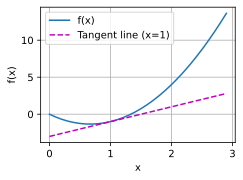

In [17]:
x = np.arange(0, 3, 0.1)
plot(x, [f0(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

4.2 Other Concepts
*   Partial derivative
*   Gradient
*   Chain rule


4.3 Other Exercise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


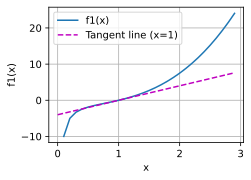

In [19]:
def f1(x):
  return (x**3 - 1 / x)

x1 = np.arange(0, 3, 0.1)
plot(x, [f1(x), 4 * x - 4], 'x', 'f1(x)', legend=['f1(x)', 'Tangent line (x=1)'])